# Overview

This notebook demonstrate how to use the `braggsr.resolution` module to analyze sensor resolution data.
The module provides functions to read and process data, fit models to the data, and visualize the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


from braggsr.resolution import (
  nr_normalized_data,
  data_conversion,
  horizontal_image_processing,
  vert_image_processing,
  image_recombine,
  Canny_edges,
  exp_edge_loc,
  ROI_zones,
  run_fit,
)

## Load Data and check for compatibility

*This program is intended to work with Float32-type images (native format for TPX1 sensor), or, with modification, with those natively saved/previously converted uint8 images. For all other image types, 

In [2]:
data_path = Path("/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization")
img_file_path = data_path / "normalized_sample_7998_obs_8015/integrated.tif"
# Load the normalized data
img = nr_normalized_data(img_file_path)

Image needs processing


quick sanity check

(512, 512) float32


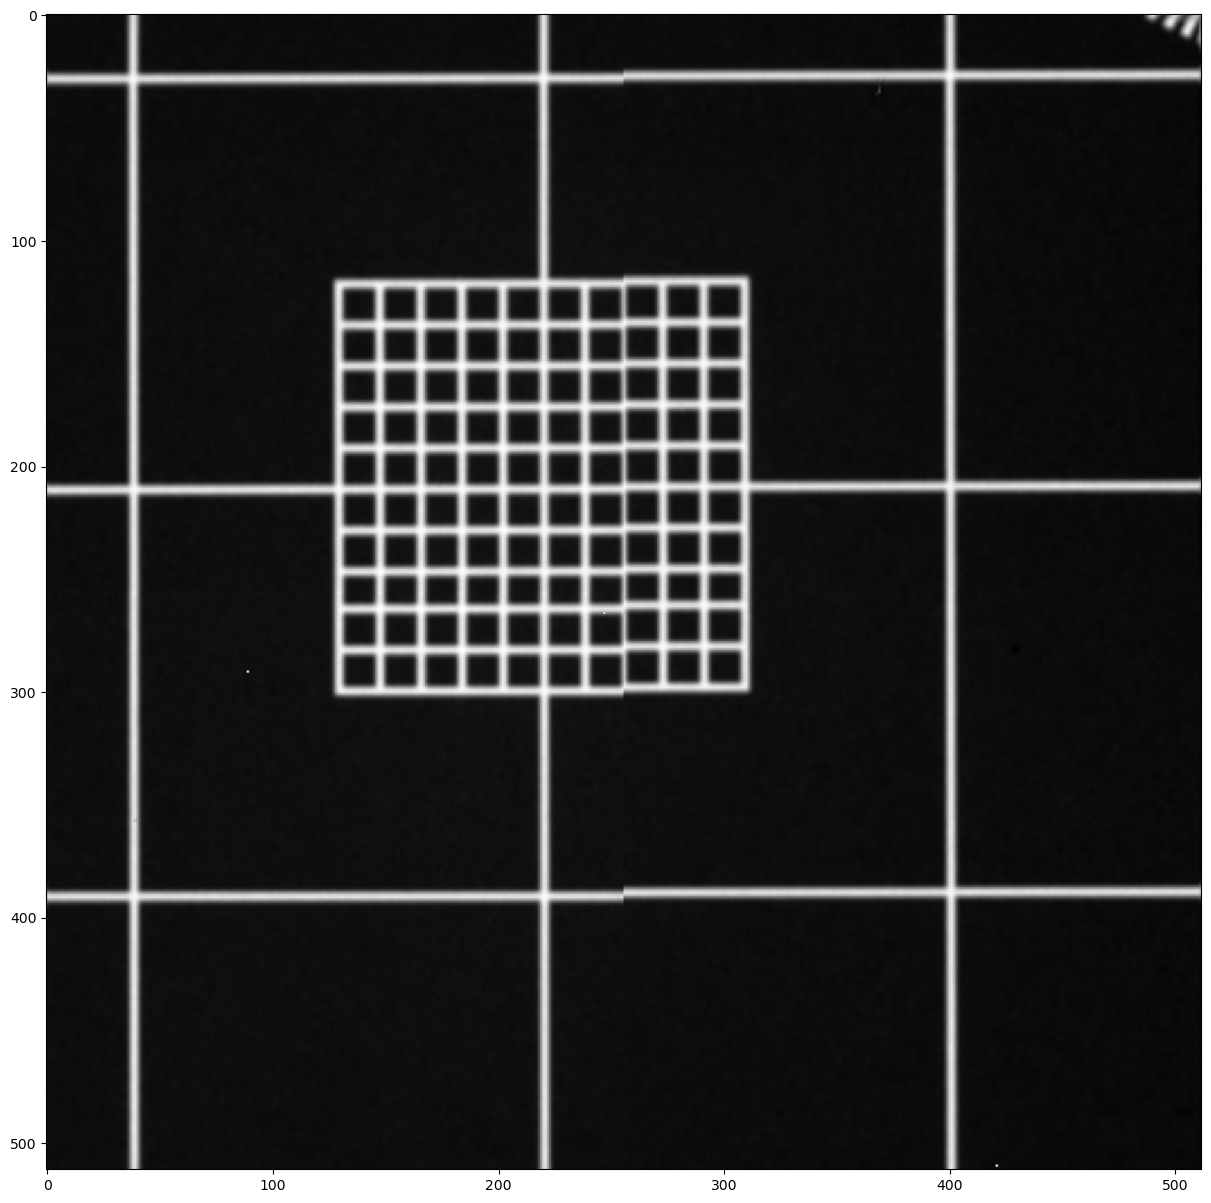

In [3]:
fig,ax = plt.subplots(1, 1, figsize=(15,15))
ax.imshow(img, cmap="gray")

print (img.shape, img.dtype)

## Processing image to identify edge locations

*Utilizes OpenCV image processing to increase contrast along edges to prep image for Canny edge identification*

In [4]:
gray_scale_img, blocksize, c_factor = data_conversion(
  img,
  alpha=0,
  beta=255,
  blocksize=15,
  c_factor=0,
)

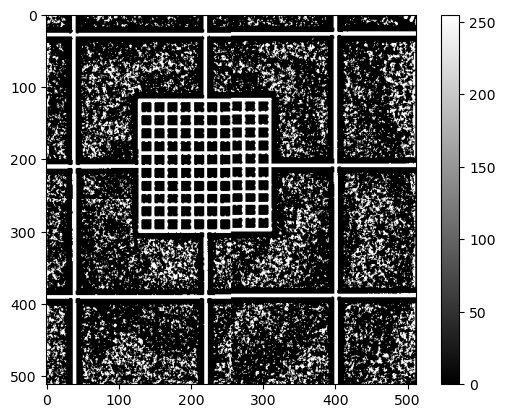

In [5]:
plt.imshow(gray_scale_img, cmap='gray')
plt.colorbar()

In [6]:
# processing horizontal edges
horizontal_img, h_scale_factor, blocksize_h, c_factor_h, kernel_size = horizontal_image_processing(
  gray_scale_img,
  h_scale_factor=30,
  blocksize=3,
  c_factor=0,
  kernel_size=(2,2),
)

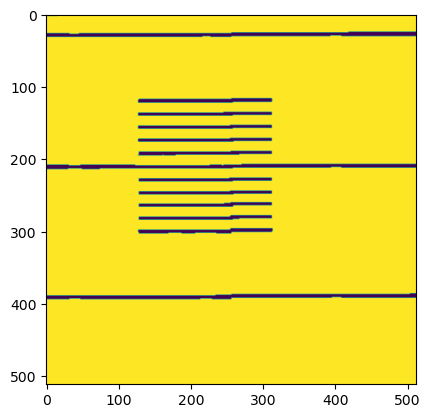

In [7]:
plt.imshow(horizontal_img)

In [8]:
# processing vertical edges
vertical_img, v_scale_factor, v_blocksize, v_c_factor, V_kernel_size = vert_image_processing(
  gray_scale_img,
  h_scale_factor=30,
  blocksize=3,
  c_factor=0,
  kernel_size=(2,2),
  )

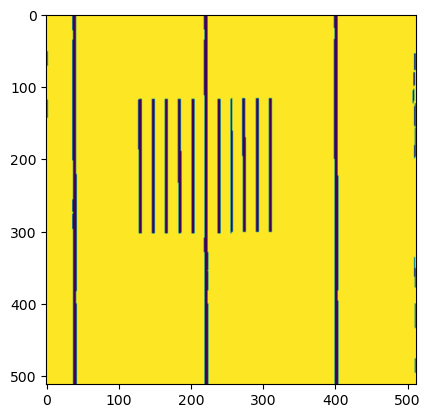

In [9]:
plt.imshow(vertical_img)

In [10]:
stack_image = image_recombine(
horizontal = horizontal_img,
vertical= vertical_img,
alpha=.5,
beta=.5,
)

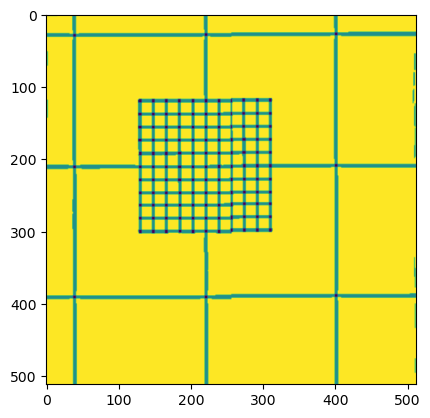

In [11]:
plt.imshow(stack_image)

## Canny Edge Detection

*Detects edges and then exports them to a separate Numpy array*

In [12]:
edges, x1, y1 = Canny_edges(
    recombined_image=stack_image,
    x1=110,
    y1=100,
    width1=130,
    height1=215,
    edges_left=0,
    edges_right=150,
)

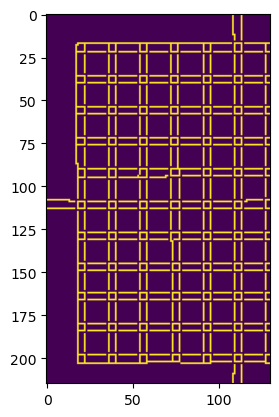

In [13]:
plt.imshow(edges)

In [14]:
edge_file = exp_edge_loc(
    edges=edges,
    x1=110,
    y1=100,
)

In [15]:
zones1, y1, l_lat_lim, r_lat_lim = ROI_zones(
    edge_locations=edge_file,
    x1=110,
    y1=100,
    left_range=5,
    right_range=3,
)

## Determine the resolution of the identified edge areas

*Runs each zone through the process of establishing edge spread function, differntiating it, and then comparing fit based on 3 classical curve fitment models to develop best fit and outputs image spatial resolution*

In [ ]:
avg_fwhm, spatial_resolution = run_fit(
    zones=zones1,
    y1=100,
    left_lat_lim=l_lat_lim,
    right_lat_lim=r_lat_lim,
    data_path=img_file_path,
)


/SNS/users/9ix/notebooks/python_notebooks/notebooks/users_notebooks/Untitled Folder/.pixi/envs/default/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


The sample size of the calculation was 1951 ,using data with R^2 value in excess of .9.
The average resolution across the ROI is 2.61402370 pixels, or 0.14377130 mm. Data-set standard deviation was 0.77187885.
The variable spatial_resolution is measured in mm, and full-width, half-maximum (FWHM) values are measured in pixels


In [ ]:
print("The variable spatial_resolution is measured in mm, and full-width, half-maximum (FWHM) values are measured in pixels.")

The variable spatial_resolution is measured in mm, and full-width, half-maximum (FWHM) values are measured in pixels
